In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
# data = Dataset('Pcfruit')
# data.read(data='D. suzukii', setting='psd_dB')
# data.clean(plot=False)
# X = make_df_parallel(names=data.filenames.tolist(), setting='raw')

In [3]:
dataset1 = Dataset('Pcfruit')
dataset1.read(data='D. suzukii', setting='psd_dB')
# print(dataset1.filenames.shape)
dataset1.clean(threshold=20 ,plot=False)

Data: D. suzukii.
Read 10493 filenames in 0.10 seconds.
Loaded data into matrix in 2.65 seconds.


### Example signal

In [4]:
# rdm = np.random.randint(0,dataset1.X.shape[0])
# dataset1.X.iloc[rdm,:].plot(figsize=(25,8), ylim=(-.2,.2))
# rdm # 2824 # 5409

## Variance

In [5]:
df = pd.DataFrame()
df['feat'] = dataset1.X.apply(lambda x: x.iloc[10:].var(), axis=1)
df['feat'].sort_values(ascending=False).head()

9569     144.617780
2360     144.214594
10435    141.518956
3366     137.647833
10243    136.840467
Name: feat, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f68d0add8>]],
      dtype=object)

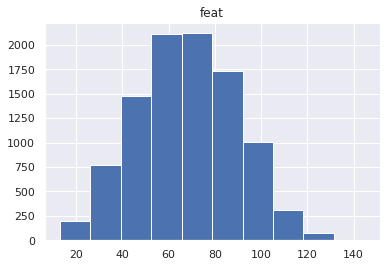

In [6]:
df.hist()

In [7]:
X = make_df_parallel(names=dataset1.filenames, setting='raw')
Xpsd = make_df_parallel(names=dataset1.filenames, setting='psd')

/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib wi

8401

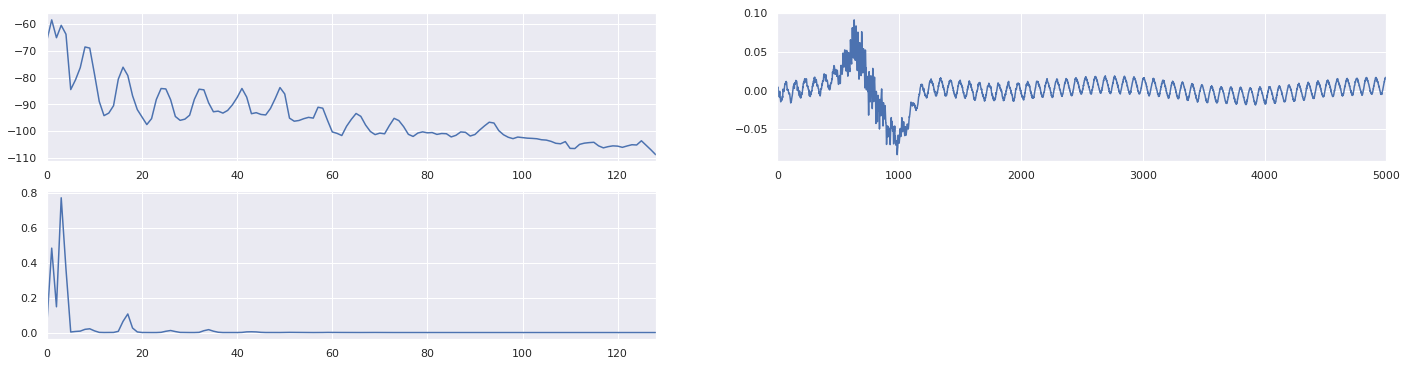

In [23]:
inds = df[(df['feat']>20) & (df['feat']<120)].index.values
sub = dataset1.X.loc[inds]
# sub = d_raw.X.loc[inds]
rdm = np.random.randint(0,sub.shape[0])
plt.figure(figsize=(24,6))
plt.subplot(2,2,1)
sub.iloc[rdm].plot()
plt.subplot(2,2,2)
X.iloc[rdm,:].plot()
plt.subplot(2,2,3)
Xpsd.iloc[rdm,:].plot()
rdm # 6018

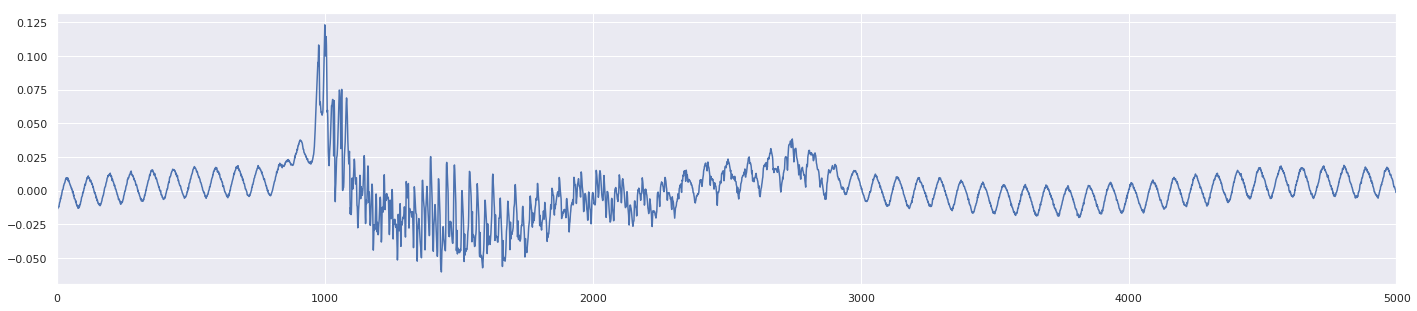

In [26]:
X.iloc[6018,:].plot(figsize=(24,5))

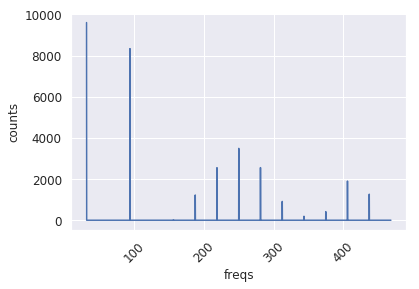

In [9]:
# X = self.X.values if isinstance(self.X, pd.DataFrame) else self.X
from scipy.signal import find_peaks
filter_signal = False
freq_range = np.linspace(0, F_S/2, 129)
freqs = []
for i in range(X.values.shape[0]):
    sig = X.values[i,:]
    if filter_signal:
        sig = butter_bandpass_filter(sig, L_CUTOFF, H_CUTOFF, F_S, B_ORDER)
    sig_tr = transform_data(sig)
    peaks, _ = find_peaks(sig_tr)
    freqs = freqs + freq_range[peaks].tolist()
sub = pd.DataFrame(pd.to_numeric(pd.Series(freqs)), columns=['freqs'])
sub = sub[sub['freqs'] < 500]
np_hist(sub,'freqs')